# Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re


# Load Data

In [2]:
df = pd.read_csv(r"..\data\new data\Imbalanced_reviews.csv", encoding='latin-1')

print("Imbalanced_reviews dataset shape:", df.shape)

Imbalanced_reviews dataset shape: (36963, 3)


# View Data

In [3]:
print("\nImbalanced_reviews dataset:")

df.info()
df.describe()


Imbalanced_reviews dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36963 entries, 0 to 36962
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rating        36963 non-null  int64 
 1   Review        36963 non-null  object
 2   ReviewLength  36963 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 866.4+ KB


,Rating,ReviewLength
count,36963.000000,36963.000000
mean,3.959825,610.114980
std,1.020558,711.886906
min,1.000000,4.000000
25%,4.000000,170.000000
50%,4.000000,334.000000
75%,5.000000,759.000000
max,5.000000,9559.000000


In [4]:
df.head()


,Rating,Review,ReviewLength
0,1,This book was so short it wouldn't even qualif...,113
1,1,I can't believe all the good reviews for this ...,259
2,1,Loved the book. Great mystery and love story. ...,133
3,1,Like another reviewer I found this book creepy...,212
4,1,This book was a real let down. Gets into peopl...,165


In [5]:
df.tail()

,Rating,Review,ReviewLength
36958,5,I love these kind of stories! I just could not...,99
36959,5,This sweet story that reminds me of Cinderella...,377
36960,5,Loved this book so much! Everyone should read ...,192
36961,5,Larissa Cross was only looking for a summer fl...,1528
36962,5,Really enjoyed this book. Hard to put down. Th...,121


# Selecting Columns

In [6]:
# Keep only relevant columns
df = df[['Rating', 'Review']]

print("Final dataset columns:", df.columns.tolist())
print("Final dataset shape:", df.shape)


Final dataset columns: ['Rating', 'Review']
Final dataset shape: (36963, 2)


# Natural Language Processing (NLP)

# Lowercase All Text

In [7]:
# Convert all review text to lowercase
df['Review'] = df['Review'].str.lower()

df.head()


,Rating,Review
0,1,this book was so short it wouldn't even qualif...
1,1,i can't believe all the good reviews for this ...
2,1,loved the book. great mystery and love story. ...
3,1,like another reviewer i found this book creepy...
4,1,this book was a real let down. gets into peopl...


# Remove URL

In [8]:
# Remove URLs from the review text
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.IGNORECASE))

df.head()


,Rating,Review
0,1,this book was so short it wouldn't even qualif...
1,1,i can't believe all the good reviews for this ...
2,1,loved the book. great mystery and love story. ...
3,1,like another reviewer i found this book creepy...
4,1,this book was a real let down. gets into peopl...


# Remove HTML tags

In [9]:
# Remove HTML tags from review text
df['Review'] = df['Review'].apply(lambda x: re.sub(r'<.*?>', '', x))

df.head()


,Rating,Review
0,1,this book was so short it wouldn't even qualif...
1,1,i can't believe all the good reviews for this ...
2,1,loved the book. great mystery and love story. ...
3,1,like another reviewer i found this book creepy...
4,1,this book was a real let down. gets into peopl...


# Remove emojis, punctuation and special characters

In [10]:
# Remove emojis, punctuation, and special characters
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# Remove extra whitespaces
df['Review'] = df['Review'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())


df.head()


,Rating,Review
0,1,this book was so short it wouldnt even qualify...
1,1,i cant believe all the good reviews for this b...
2,1,loved the book great mystery and love story wo...
3,1,like another reviewer i found this book creepy...
4,1,this book was a real let down gets into people...


# Showing stopwords

In [11]:
import spacy

# Load SpaCy English model
nlp = spacy.load('en_core_web_sm')

# Example: get stopwords list
stopwords = nlp.Defaults.stop_words
print(f"Number of stopwords: {len(stopwords)}")
print("Sample stopwords:", list(stopwords)[:20])

#  count stopwords in each review
df['Stopword_Count'] = df['Review'].apply(lambda x: sum(1 for token in x.split() if token in stopwords))


df[['Review', 'Stopword_Count']].head()


Number of stopwords: 326
Sample stopwords: ['ourselves', 'itself', 'before', 'latterly', 'around', 'less', 'alone', '’ve', 'their', 'never', 'them', 'might', 'afterwards', 'up', 'not', 'yourself', 'none', 'each', 'our', 'somehow']


,Review,Stopword_Count
0,this book was so short it wouldnt even qualify...,15
1,i cant believe all the good reviews for this b...,25
2,loved the book great mystery and love story wo...,12
3,like another reviewer i found this book creepy...,18
4,this book was a real let down gets into people...,13


# Total stopwords in all reviews:

In [12]:
# Total stopwords in the entire dataset
total_stopwords = df['Stopword_Count'].sum()
print("Total stopwords in all reviews:", total_stopwords)


Total stopwords in all reviews: 2280723


# Remove stopwords

In [13]:
# Function to remove stopwords
def remove_stopwords(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if token.text not in nlp.Defaults.stop_words])

# Apply to the Review column
df['Review'] = df['Review'].apply(remove_stopwords)

df.head()


,Rating,Review,Stopword_Count
0,1,book short nt qualify novella guess pay free,15
1,1,nt believe good reviews book like taking lesso...,25
2,1,loved book great mystery love story read books...,12
3,1,like reviewer found book creepy repulsed bacch...,18
4,1,book real let gets people turning animals biza...,13


# Apply Lemmatization

In [14]:

# Function for lemmatization
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Apply lemmatization to the Review column
df['Review'] = df['Review'].apply(lemmatize_text)

df.head()


,Rating,Review,Stopword_Count
0,1,book short not qualify novella guess pay free,15
1,1,not believe good review book like take lesson ...,25
2,1,love book great mystery love story read book a...,12
3,1,like reviewer find book creepy repulse bacchus...,18
4,1,book real let get people turn animal bizarre s...,13


# Filter out reviews with: Fewer than minimum words and Excessively long text

In [15]:
# Define thresholds
min_words = 3      # Minimum words per review
max_words = 300     # Maximum words per review

# Count words in each review
df['Word_Count'] = df['Review'].apply(lambda x: len(x.split()))

# Filter reviews
df = df[(df['Word_Count'] >= min_words) & (df['Word_Count'] <= max_words)].reset_index(drop=True)

# Preview dataset after filtering
print("Dataset shape after filtering:", df.shape)
df[['Review', 'Word_Count']].head()


Dataset shape after filtering: (36686, 4)


,Review,Word_Count
0,book short not qualify novella guess pay free,8
1,not believe good review book like take lesson ...,26
2,love book great mystery love story read book a...,13
3,like reviewer find book creepy repulse bacchus...,20
4,book real let get people turn animal bizarre s...,16


# Word count

In [16]:
# Add a column with word count for each review
df['Word_Count'] = df['Review'].apply(lambda x: len(x.split()))


df[['Review', 'Word_Count']].head()




,Review,Word_Count
0,book short not qualify novella guess pay free,8
1,not believe good review book like take lesson ...,26
2,love book great mystery love story read book a...,13
3,like reviewer find book creepy repulse bacchus...,20
4,book real let get people turn animal bizarre s...,16


In [17]:
# statistics on word count
print("Word Count Statistics:")
df['Word_Count'].describe()

Word Count Statistics:


count    36686.000000
mean        46.310118
std         48.947525
min          3.000000
25%         14.000000
50%         26.000000
75%         59.000000
max        300.000000
Name: Word_Count, dtype: float64

# Data Visualization

# Bar plot: Review count per rating

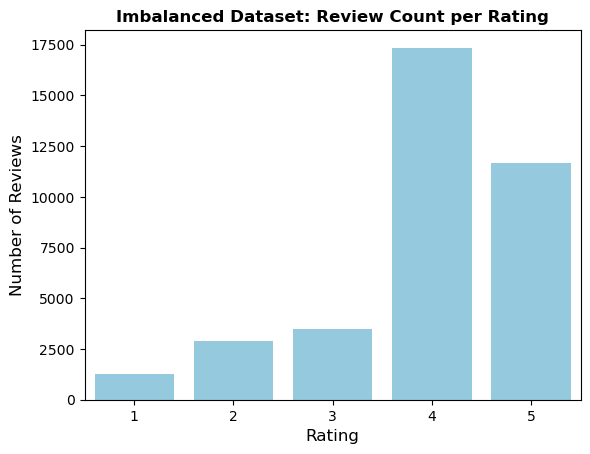

In [18]:
sns.countplot(x='Rating', data=df, color='skyblue')
plt.title('Imbalanced Dataset: Review Count per Rating', fontsize=12, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


# Rating Distribution (Pie Chart)

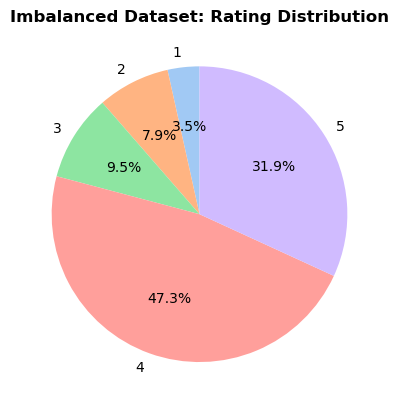

In [19]:
# Count of reviews per rating
rating_counts = df['Rating'].value_counts().sort_index()

# Labels and values for pie chart
categories = rating_counts.index
values = rating_counts.values

plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Imbalanced Dataset: Rating Distribution", fontsize=12, weight='bold')
plt.show()


# Histogram for Word Count

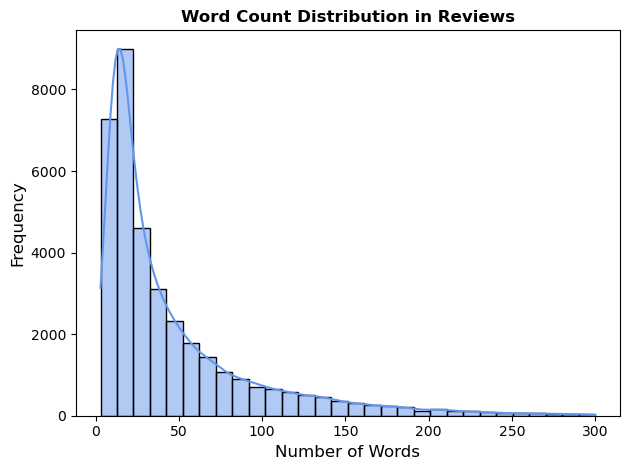

In [20]:
sns.histplot(df['Word_Count'], bins=30, kde=True, color='cornflowerblue')
plt.title('Word Count Distribution in Reviews', fontsize=12, weight='bold')
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)



plt.tight_layout()
plt.show()

# Box Plot: Word count by Rating

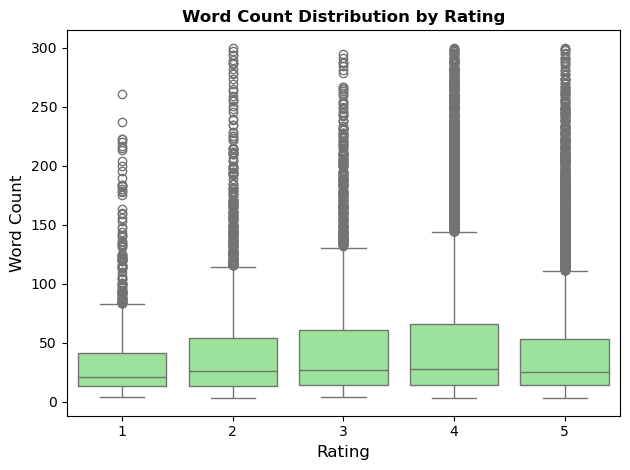

In [21]:

sns.boxplot(x='Rating', y='Word_Count', data=df, color='lightgreen')
plt.title('Word Count Distribution by Rating', fontsize=12, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()



# full sample reviews per rating

In [22]:
# Display 5 sample reviews per rating
for rating, group in df.groupby('Rating'):
    print(f"\n--- Rating: {rating} ---\n")
    sample_reviews = group['Review'].sample(
        n=min(5, len(group)),
        random_state=42
    )
    for i, review in enumerate(sample_reviews, 1):
        print(f"{i}. {review}\n")



--- Rating: 1 ---

1. resolution beginning think plot twist middle ending disappoint

2. find extremely difficult not complain cost 99 cent give

3. short read little government not waste time purchase star free

4. not like paranormal plot good reading point animal pack enter picture yuk

5. care book people enjoy hear evidence haunt story opinion blame problem demon exist person get divorce demon person steal demon call haunt power suggestion denial true cause thing go wrong life look mirror cause person blame


--- Rating: 2 ---

1. particularly gruesome end novel ensure sha not follow shaun riker adventure detective story murder story ill gruesome page

2. like main character story bad read recommend reader

3. oh demon commonly write short story horror demon scary scary imagine life suddenly disrupt creature hell dimensionover bridge definitely fall category precede review great job pointing reason story not work little explanation go bridge main character stuff little payoff end

# Keep only Review and Rating columns

In [23]:

df = df[['Review', 'Rating']]

# Check final columns and shape
print("Final dataset columns:", df.columns.tolist())
print("Final dataset shape:", df.shape)
df.head()


Final dataset columns: ['Review', 'Rating']
Final dataset shape: (36686, 2)


,Review,Rating
0,book short not qualify novella guess pay free,1
1,not believe good review book like take lesson ...,1
2,love book great mystery love story read book a...,1
3,like reviewer find book creepy repulse bacchus...,1
4,book real let get people turn animal bizarre s...,1


# Shuffle the dataset

In [37]:
# Shuffle the dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Preview the first few rows
df.head()


,Review,Rating
0,book make wish young explore sexuality college...,4
1,dull moment get catch page rachel friend danny...,4
2,movie man s sleep discover s secret undergroun...,5
3,joann carter fill lovely story vivid descripti...,4
4,short novella quick read story interesting ins...,4


# Train-Test Split

In [38]:
from sklearn.model_selection import train_test_split

# Features and target
X = df['Review']
y = df['Rating']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (29348,)
Testing set shape: (7338,)


In [39]:
# Save train and test sets to CSV files
train_data = pd.DataFrame({'Review': X_train, 'Rating': y_train})
test_data = pd.DataFrame({'Review': X_test, 'Rating': y_test})

train_csv_path = r"..\data\new data\imbalanced_train.csv"
test_csv_path = r"..\data\new data\imbalanced_test.csv"

train_data.to_csv(train_csv_path, index=False, encoding='utf-8')
test_data.to_csv(test_csv_path, index=False, encoding='utf-8')

print(f"Training set saved at: {train_csv_path}")
print(f"Testing set saved at: {test_csv_path}")

Training set saved at: ..\data\new data\imbalanced_train.csv
Testing set saved at: ..\data\new data\imbalanced_test.csv


In [40]:


# Convert lists to pandas Series
X_train = pd.Series(X_train)
X_test = pd.Series(X_test)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

# Now you can check shape and value counts
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts())
print("y_test distribution:\n", y_test.value_counts())

X_train shape: (29348,)
X_test shape: (7338,)
y_train distribution:
 Rating
4    13876
5     9348
3     2778
2     2326
1     1020
Name: count, dtype: int64
y_test distribution:
 Rating
4    3470
5    2337
3     694
2     582
1     255
Name: count, dtype: int64


# Text Feature Extraction using TF-IDF Vectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    max_features=15000,   # expand features
    ngram_range=(1, 3),   # unigrams + bigrams + trigrams
    min_df=2,
    max_df=0.95
)



# Fit TF-IDF on training data and transform
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = vectorizer.transform(X_test)

print("Training TF-IDF shape:", X_train_tfidf.shape)
print("Testing TF-IDF shape:", X_test_tfidf.shape)


Training TF-IDF shape: (29348, 15000)
Testing TF-IDF shape: (7338, 15000)


In [42]:
from sklearn.utils.class_weight import compute_class_weight


classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))



In [43]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)


(29348, 15000)
(7338, 15000)


In [44]:
# -----------------------------
#  Feature Selection (chi²)

from sklearn.feature_selection import SelectKBest, chi2

k = 35000  # Keep top 15,000 features
selector = SelectKBest(chi2, k=k)
X_train_selected = selector.fit_transform(X_train_tfidf, y_train)
X_test_selected = selector.transform(X_test_tfidf)

print("Training shape after feature selection:", X_train_selected.shape)
print("Testing shape after feature selection:", X_test_selected.shape)

Training shape after feature selection: (29348, 15000)
Testing shape after feature selection: (7338, 15000)


C:\Users\sreel\AppData\Roaming\Python\Python313\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=35000 is greater than n_features=15000. All the features will be returned.
  warnings.warn(


# Convert TF-IDF Matrices to DataFrames

In [45]:
# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Convert TF-IDF matrices to DataFrames
X_train_df = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)
X_test_df = pd.DataFrame(X_test_tfidf.toarray(), columns=feature_names)

print("\nTrain TF-IDF DataFrame shape:", X_train_df.shape)
print("Test TF-IDF DataFrame shape:", X_test_df.shape)
X_train_df.head()



Train TF-IDF DataFrame shape: (29348, 15000)
Test TF-IDF DataFrame shape: (7338, 15000)


,099,10,10 minute,10 year,10 year old,100,100 page,100 year,1000,101,...,zombie,zombie apocalypse,zombie book,zombie books,zombie story,zone,zorn,zorn warrior,zu,zum
0,0.0,0.125026,0.0,0.152135,0.169404,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
X_train_df.tail()

,099,10,10 minute,10 year,10 year old,100,100 page,100 year,1000,101,...,zombie,zombie apocalypse,zombie book,zombie books,zombie story,zone,zorn,zorn warrior,zu,zum
29343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
import os
import joblib

model_dir = r"..\models"
os.makedirs(model_dir, exist_ok=True)

# Save word-level TF-IDF vectorizer
word_vectorizer_path = os.path.join(model_dir, "tfidf_imbalanced.pkl")
joblib.dump(vectorizer, word_vectorizer_path)

print(f"Word-level TF-IDF Vectorizer saved at: {word_vectorizer_path}")

Word-level TF-IDF Vectorizer saved at: ..\models\tfidf_imbalanced.pkl


# Training and Evaluation of Machine Learning Models

C:\Users\sreel\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\sreel\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.5213

Classification Report:
              precision    recall  f1-score   support

           1     0.2520    0.5059    0.3364       255
           2     0.3653    0.3007    0.3299       582
           3     0.2310    0.3545    0.2797       694
           4     0.6507    0.5395    0.5899      3470
           5     0.5834    0.6003    0.5917      2337

    accuracy                         0.5213      7338
   macro avg     0.4165    0.4602    0.4255      7338
weighted avg     0.5531    0.5213    0.5317      7338



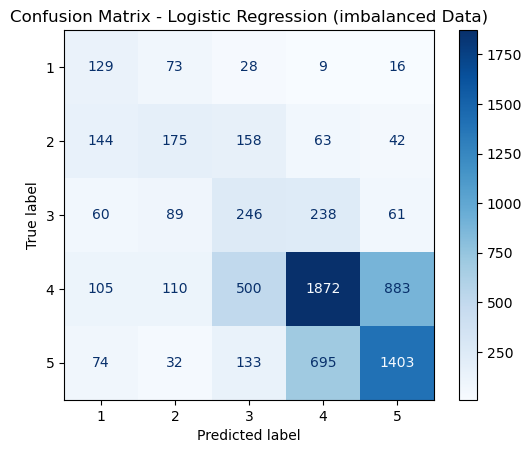

In [48]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize Logistic Regression model
lr_model = LogisticRegression(
    max_iter=6000,
    solver='saga',              # good for large sparse data
    multi_class='multinomial',
    class_weight=class_weights_dict,
    random_state=42
)

# Train the model
lr_model.fit(X_train_tfidf, y_train)

# Predict on test data
y_pred = lr_model.predict(X_test_tfidf)

# Evaluate performance
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Logistic Regression (imbalanced Data)")
plt.show()

# Saving Trained Machine Learning Models

In [49]:
import joblib
import os

model_dir = r"..\models"
os.makedirs(model_dir, exist_ok=True)  

model_path = os.path.join(model_dir, 'Model_Imbalanced.pkl')

# Save the trained Logistic Regression model
joblib.dump(lr_model, model_path)
print(f"Model saved successfully at {model_path}")




Model saved successfully at ..\models\Model_Imbalanced.pkl
